In [133]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import numpy
numpy.set_printoptions(threshold=np.inf)

%matplotlib inline

In [134]:
#Carregando arquivos com 5000 linhas e 400 colunas de features (dimensoes)
dataFeatures = np.loadtxt("ex3data1X.txt", delimiter=',')
#Carregando arquivos com 5000 linhas e 10 colunas de classes
dataClasses = np.loadtxt("ex3data1y.txt", delimiter=',')

X = dataFeatures[ : 4000]
y = dataClasses[ : 4000]
y = y.reshape((4000,10))

XTest = dataFeatures[4000 : 4500]
yTest = dataClasses[4000 : 4500]
yTest = yTest.reshape((500,10))

XValid = dataFeatures[4500 : 5000]
yValid = dataClasses[4500 : 5000]
yValid = yValid.reshape((500,10))



In [135]:
#definindo informações importantes
num_examples = int(4000)
features = int(400) 
classes = 10 
 
epsilon = 0.001 
reg_lambda = 0.01

In [140]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = 1/(1 + np.exp(-z1))
    z2 = a1.dot(W2) + b2
    probs = z2
    
    return probs

In [150]:
def build_model(nodes_oculta, num_passes=1000):
     
    np.random.seed(0)
    W1 = np.random.randn(features, nodes_oculta) / np.sqrt(features)
    b1 = np.zeros((1, nodes_oculta))
    W2 = np.random.randn(nodes_oculta, classes) / np.sqrt(nodes_oculta)
    b2 = np.zeros((1, classes))
 
    # saida
    model = {}
    list_erros = []
    list_erros_eval = []
    last_error = 1000
    
    # Gradiente descendente.
    for i in range(0, num_passes):
        
        np.random.shuffle(X)
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = 1/(1 + np.exp(-z1))
        z2 = a1.dot(W2) + b2
        probs = z2

        # calculo erro
        erro = y - probs
        
        # Backpropagation
        delta3 = probs
        dW2 = (a1.T).dot(erro)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * ( 1/(1 + np.exp(-z1)) *  ( 1 - ( 1/(1 + np.exp(-z1)) ) ) )
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # regularizacao
        #dW2 += reg_lambda * W2
        #dW1 += reg_lambda * W1
 
        # Gradiente descendente atualizacao
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        erro_eval = yValid - predict(model, XValid)
        
        erro_epoca = np.sum(np.sum(np.power(erro, np.full(erro.shape, 2)), axis=0)/erro.shape[1])/erro.shape[0]
        
        erro_eval_epoca = np.sum(np.sum(np.power(erro_eval, np.full(erro_eval.shape, 2)), axis=0)/erro_eval.shape[1])/erro_eval.shape[0]
        
        list_erros.append(erro_epoca)
        list_erros_eval.append(erro_eval_epoca)
        
        print('Epoch:  {}\nErro: {}\nErro Eval: {}'.format(str(i), str(erro_epoca), str(erro_eval_epoca)))
        #if last_error < erro_eval_epoca :
        #    break
        #else:
        #    last_error = erro_eval_epoca
     
    return model, list_erros, list_erros_eval

In [151]:
model, list_erros, list_erros_eval = build_model(int(10), num_passes=10)

Epoch:  0
Erro: 0.657185526728
Erro Eval: 7.72313416475
Epoch:  1
Erro: 8.13453897493
Erro Eval: 95.8994297641
Epoch:  2
Erro: 94.4760600606
Erro Eval: 97.9809269628
Epoch:  3
Erro: 96.6525415195
Erro Eval: 100.464631419
Epoch:  4
Erro: 99.2352562089
Erro Eval: 103.348588486
Epoch:  5
Erro: 102.218688893
Erro Eval: 106.632647906
Epoch:  6
Erro: 105.602405969
Erro Eval: 110.316760395
Epoch:  7
Erro: 109.386271951
Erro Eval: 114.400904337
Epoch:  8
Erro: 113.570236692
Erro Eval: 118.885068604
Epoch:  9
Erro: 118.154262868
Erro Eval: 123.769246827


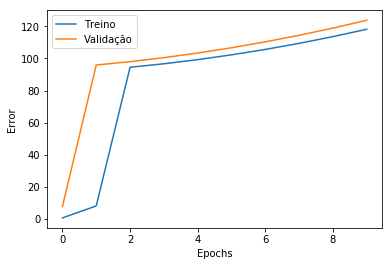

In [152]:
plt.plot(np.arange(len(list_erros)), list_erros, label="Treino")
plt.plot(np.arange(len(list_erros_eval)), list_erros_eval, label="Validação")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()